<a href="https://colab.research.google.com/github/VaishnaviKrishnamoorthy/Mobile_Price_prediction/blob/main/Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/VaishnaviKrishnamoorthy/Mobile_Price_prediction/main/Cellphone.csv")

In [3]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [4]:
print("The original dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The original dataset has 161 rows and 14 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_id,161.0,675.559006,410.851583,10.0,237.0,774.00,1026.000,1339.0
Price,161.0,2215.596273,768.187171,614.0,1734.0,2258.00,2744.000,4361.0
Sale,161.0,621.465839,1546.618517,10.0,37.0,106.00,382.000,9807.0
weight,161.0,170.426087,92.888612,66.0,134.1,153.00,170.000,753.0
resoloution,161.0,5.209938,1.509953,1.4,4.8,5.15,5.500,12.2
ppi,161.0,335.055901,134.826659,121.0,233.0,294.00,428.000,806.0
cpu core,161.0,4.857143,2.444016,0.0,4.0,4.00,8.000,8.0
cpu freq,161.0,1.502832,0.599783,0.0,1.2,1.40,1.875,2.7
internal mem,161.0,24.501714,28.804773,0.0,8.0,16.00,32.000,128.0
ram,161.0,2.204994,1.609831,0.0,1.0,2.00,3.000,6.0


# **Data Cleaning**

# Checking duplicates in the data

In [7]:
df.duplicated().sum()
# here we does not have any dulicate value.

0

# Checking Missing values in the data

In [8]:
df.isnull().sum()
# here we does not have any missing value.

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

# **droping unwanted features.**

In [9]:
df.drop(['Product_id'],axis=1,inplace=True)

# **EDA**

In [10]:
import plotly.express as px
fig=px.scatter(df,x='Sale',y='Price')
fig.show()

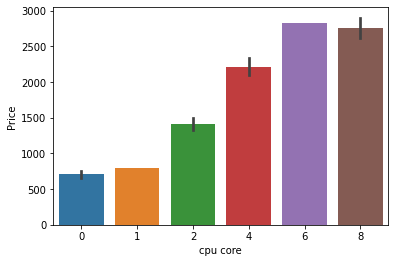

In [11]:
sns.barplot(x='cpu core',y='Price',data=df)

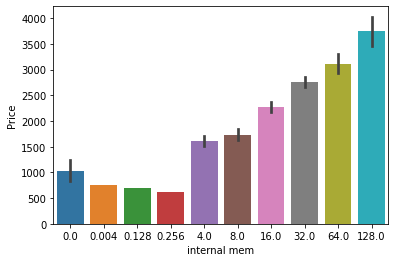

In [12]:
sns.barplot(x='internal mem',y='Price',data=df)

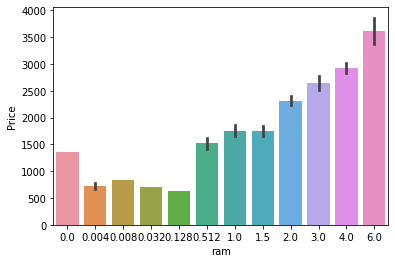

In [13]:
sns.barplot(x='ram',y='Price',data=df)

In [14]:
fig=px.scatter(df,x='Front_Cam',y='Price')
fig.show()

In [15]:
fig=px.scatter(df,x='RearCam',y='Price')
fig.show()

In [16]:
fig=px.scatter(df,x='ppi',y='Price')
fig.show()

In [17]:
fig=px.scatter(df,x='resoloution',y='Price')
fig.show()

In [18]:
fig=px.scatter(df,x='cpu freq',y='Price')
fig.show()

In [19]:
fig=px.scatter(df,x='battery',y='Price')
fig.show()

In [20]:
fig=px.scatter(df,x='weight',y='Price')
fig.show()

# **Finding Outliers**

In [21]:
outlier_percentage = {}
for feature in df.columns:
    tempData = df.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'Price': 1.24,
 'Sale': 14.91,
 'weight': 14.91,
 'resoloution': 16.15,
 'ppi': 1.24,
 'cpu core': 0.0,
 'cpu freq': 6.21,
 'internal mem': 4.97,
 'ram': 0.0,
 'RearCam': 0.0,
 'Front_Cam': 0.0,
 'battery': 3.73,
 'thickness': 4.97}

# Removing Outlier

In [22]:
outlier = df[(df[feature]>Lower_range) & (df[feature]<Upper_range)].reset_index(drop=True)

In [23]:
df.columns

Index(['Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

# Splitting and scalling

In [24]:
X = df[['Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']].values 
y = df['Price'].values 

In [25]:
original_feature =  df[['Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']]

In [26]:
print(f"Independent features has {X.shape[0]} rows and {X.shape[1]} columns")
print(f"Dependent features has {y.shape[0]} rows and 1 column")

Independent features has 161 rows and 12 columns
Dependent features has 161 rows and 1 column


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
print("The shape of X train:", X_train.shape)
print("The shape of X test:", X_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)

The shape of X train: (112, 12)
The shape of X test: (49, 12)
The shape of y train: (112,)
The shape of y test: (49,)


In [29]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# **LinearRegression**

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
from sklearn.metrics import  r2_score
y_pred = regressor.predict(X_test_scaled)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.9502439318311011


# **KNN-Regression**

In [32]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,50]: 
  knn = KNeighborsRegressor(i) 
  knn.fit(X_train_scaled,y_train) 
  print("K value  : " , i,"train_score;",knn.score(X_train_scaled,y_train), " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

K value  :  1 train_score; 1.0  score :  0.8872164663853594
K value  :  2 train_score; 0.9837552641433933  score :  0.8607466129797989
K value  :  3 train_score; 0.9568126976834536  score :  0.8347739873476531
K value  :  4 train_score; 0.9308612972717465  score :  0.8410889712817153
K value  :  5 train_score; 0.9257874939414376  score :  0.8459965635022009
K value  :  6 train_score; 0.9263934879635065  score :  0.8485811274403922
K value  :  7 train_score; 0.9192961478619451  score :  0.839947485586765
K value  :  8 train_score; 0.907443654469064  score :  0.842161360845956
K value  :  9 train_score; 0.9103103719976879  score :  0.8463924084122253
K value  :  10 train_score; 0.9081657120727074  score :  0.8449366174835756
K value  :  20 train_score; 0.865420262566468  score :  0.8156402568162848
K value  :  50 train_score; 0.7077567911423747  score :  0.6408288159133233


In [33]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(1)
knn.fit(X_train_scaled,y_train)
y_pred = knn.score(X_test_scaled,y_test)

In [34]:
from sklearn.metrics import  r2_score
y_pred = knn.predict(X_test_scaled)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.9704489695689874


# **Decision Tree**

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import r2_score
for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeRegressor(max_depth=depth) 
  dt.fit(X_train, y_train) 
  trainAccuracy = r2_score(y_train, dt.predict(X_train)) 
  dt = DecisionTreeRegressor(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10, scoring = make_scorer(r2_score)) 
  print("depth :",depth, "train_R2 :",trainAccuracy, "val scaore :" ,np.mean(valAccuracy))

depth : 1 train_R2 : 0.617803032711584 val scaore : 0.5700776938725667
depth : 2 train_R2 : 0.837480752070281 val scaore : 0.7203093862935044
depth : 3 train_R2 : 0.9106288057751806 val scaore : 0.8186983572799906
depth : 4 train_R2 : 0.9552500942926154 val scaore : 0.8205277529969072
depth : 5 train_R2 : 0.9794657854191036 val scaore : 0.8875955933939548
depth : 6 train_R2 : 0.9917787202391777 val scaore : 0.868396252617762
depth : 7 train_R2 : 0.9973382935849978 val scaore : 0.8831178319826313
depth : 8 train_R2 : 0.9988557396366902 val scaore : 0.9155732601877025
depth : 9 train_R2 : 0.9996506449545817 val scaore : 0.9364777233029479
depth : 10 train_R2 : 0.9999784741849361 val scaore : 0.9158009540986102
depth : 20 train_R2 : 1.0 val scaore : 0.913413540783915
depth : 40 train_R2 : 1.0 val scaore : 0.9137473852985872
depth : 60 train_R2 : 1.0 val scaore : 0.8939486794035961


In [36]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 40)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=40)

In [37]:
from sklearn.metrics import  r2_score
y_pred = dt.predict(X_test)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.9330667268004769


#**Random forest regression**

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

In [39]:
from sklearn.metrics import  r2_score
y_pred = rf.predict(X_test_scaled)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.9354720798685047


# **XG boster**

In [40]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(X_train,y_train) 
  model.score(X_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.3413789194681287  Cross-Val score :  -0.7478387258945365
Learning rate :  0.02  Train score :  0.7701581710230267  Cross-Val score :  0.6636794731626623
Learning rate :  0.03  Train score :  0.9483416269207634  Cross-Val score :  0.8845865521911366
Learning rate :  0.04  Train score :  0.9817376338627635  Cross-Val score :  0.9211746069002154
Learning rate :  0.05  Train score :  0.9905985003989256  Cross-Val score :  0.9314511096399173
Learning rate :  0.06  Train score :  0.9935288003320397  Cross-Val score :  0.9359436266377832
Learning rate :  0.07  Train score :  0.9953701705379668  Cross-Val score :  0.9387542616745392
Learning rate :  0.08  Train score :  0.9964086196170119  Cross-Val score :  0.9357489928280049
Learning rate :  0.09  Train score :  0.9973935440779841  Cross-Val score :  0.9424727286827641
Learning rate :  0.1  Train score :  0.997866748300179  Cross-Val score :  0.9416300992308081
Learning rate :  0.11  Train score :  0.

In [41]:
model = xgb.XGBRegressor(learning_rate = 0.2, n_estimators=100)
model.fit(X_train,y_train)

[09:17:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2)

In [42]:
from sklearn.metrics import  r2_score
y_pred = model.predict(X_test)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.9763982174825792


# **R2 Square of every Model**

In [43]:
from sklearn.metrics import  r2_score
print("R2 Value for Linear Regression: {}".format(r2_score(y_test,regressor.predict(X_test_scaled))))
print("R2 Value for KNN Regression: {}".format(r2_score(y_test,knn.predict(X_test_scaled))))
print("R2 Value for DecisionTreeRegressor: {}".format(r2_score(y_test,dt.predict(X_test))))
print("R2 Value for RandomForestRegressor: {}".format(r2_score(y_test,rf.predict(X_test_scaled))))
print("R2 Value for XGBooster: {}".format(r2_score(y_test,model.predict(X_test))))

R2 Value for Linear Regression: 0.9502439318311011
R2 Value for KNN Regression: 0.9704489695689874
R2 Value for DecisionTreeRegressor: 0.9330667268004769
R2 Value for RandomForestRegressor: 0.9354720798685047
R2 Value for XGBooster: 0.9763982174825792


# **So,We are going to take XG-Booster so doing label encoding for buildtype**

# **Feature importance using Random Forest algorithm**

In [44]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: ram                  Importance: 0.23
Variable: cpu freq             Importance: 0.16
Variable: internal mem         Importance: 0.14
Variable: ppi                  Importance: 0.13
Variable: Front_Cam            Importance: 0.09
Variable: battery              Importance: 0.08
Variable: thickness            Importance: 0.06
Variable: RearCam              Importance: 0.04
Variable: resoloution          Importance: 0.03
Variable: Sale                 Importance: 0.01
Variable: weight               Importance: 0.01
Variable: cpu core             Importance: 0.01


# **Importing the Best model using pickle package**

In [45]:
import pickle
filename = "mobile_prediction_model"
pickle.dump(model,open(filename,'wb'))

In [46]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(X_test)

[09:17:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([3010.2021,  749.1591, 1920.6512, 2136.999 , 2866.8123, 2727.3125,
       2087.833 , 3012.1863, 1417.2375,  803.3233, 2258.95  , 1774.0339,
       1837.2852, 3159.0742, 3229.35  , 1562.1818, 1562.1818, 2575.4495,
       2507.2886, 1635.4935, 2013.4224, 3644.4731, 1723.371 , 1357.067 ,
       2327.9917, 2669.5933, 3083.0195, 3012.1863, 1525.036 , 2087.833 ,
       2430.1304, 1919.5889, 1948.5724, 2712.2812, 1293.7512, 2560.676 ,
       2502.7817, 2202.611 , 2804.0796, 1441.0115, 2327.9917, 2946.8394,
       2336.5176, 4355.586 , 3010.2021, 3159.0742, 2345.894 , 3075.605 ,
       1441.0115], dtype=float32)